# Laboratory of Computational Physics Mod. A - Pylab 06

## Student

Luca Menti

## ID

2063594


## Email

luca.menti@studenti.unipd.it

## Course

Physics of Data

# Exercise 

### This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

### - 1. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

### - 2. Find out the number of BX in a ORBIT (the value 'x').

### - 3. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

### - 4. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

### - 5. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

### - 6. Create a new DataFrame that contains only the rows with HEAD=1.

### - 7. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

### - 8. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

### - 9. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [111]:
import pandas as pd

#ex 1

data = pd.read_csv('data_000637.txt', sep="[;,]", engine='python')
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [112]:
#ex 2 
data.loc[data['BX_COUNTER'].idxmax()]

x=data['BX_COUNTER'].max()

print("The value x is:", x)

The value x is: 3563


In [113]:
#ex 3 trovare differenza tra. massimo e minimo tempo in nano secondi

In [114]:
#ex 4
data['timens']=data['BX_COUNTER']*25 + data['TDC_MEAS']*25/30 + data['ORBIT_CNT']*25*x
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.446500e+14
1310716,1,1,4,3869211171,763,11,3.446500e+14
1310717,1,0,64,3869211171,764,0,3.446500e+14
1310718,1,0,139,3869211171,769,0,3.446500e+14


In [115]:
#ex 3 trovare differenza tra. massimo e minimo tempo in nano secondi

ymax=data['timens'].max()
ymin=data['timens'].min()

print("Find out how much the data taking lasted", ymax-ymin)

Find out how much the data taking lasted 980141153.3125


In [116]:
# ex 5
import random 
kk=[]
for _ in range(data.shape[0]):
    k = random.randint(0, 1)
    kk.append(k)
    #data['HEAD'] = data['HEAD'].replace(1, k)


data['HEAD'] = kk
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,3.446490e+14
1,0,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14,3.446500e+14
1310716,1,1,4,3869211171,763,11,3.446500e+14
1310717,0,0,64,3869211171,764,0,3.446500e+14
1310718,0,0,139,3869211171,769,0,3.446500e+14


In [118]:
#ex 6
datanew=data[ data['HEAD'] == 1 ]
datanew

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
5,1,0,63,3869200167,2762,4,3.446490e+14
...,...,...,...,...,...,...,...
1310706,1,0,28,3869211171,44,29,3.446500e+14
1310707,1,0,57,3869211171,137,29,3.446500e+14
1310711,1,1,39,3869211171,430,0,3.446500e+14
1310713,1,0,64,3869211171,758,18,3.446500e+14


Text(0.5, 0.98, 'FPGA 1')

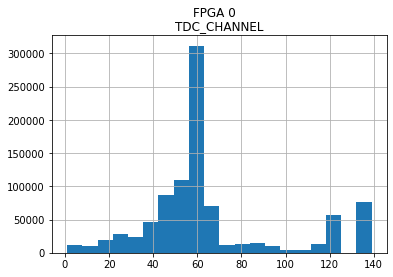

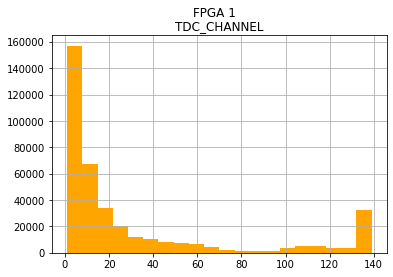

In [135]:
# ex 7
import matplotlib as plt
import pylab as pl

dataFPGA0=data[data["FPGA"]== 0]
dataFPGA1=data[data["FPGA"]== 1]
dataFPGA0.hist(column='TDC_CHANNEL', bins=20)
pl.suptitle("FPGA 0")

dataFPGA1.hist(column='TDC_CHANNEL', bins=20,color='orange')
pl.suptitle("FPGA 1")

In [153]:
#ex 8
datatdc=data.groupby(by=["TDC_CHANNEL"]).sum()
datatdc

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
TDC_CHANNEL,,,,,,
1,14829,28438,114733571761779,52999263,430533,1.021989e+19
2,17157,32669,132601566229845,61017792,499099,1.181148e+19
3,11804,21970,90783184937635,41678301,340104,8.086512e+18
4,14451,26403,111259024921199,51473537,416945,9.910398e+18
5,8310,15003,63590404218625,29099531,238778,5.664315e+18
...,...,...,...,...,...,...
129,18,35,143160633554,67804,612,1.275203e+16
130,40,38,274713643273,124418,993,2.447012e+16
137,37,36,263106045511,123920,748,2.343617e+16


In [154]:
print("The most noisy is:", "\n",datatdc[datatdc.BX_COUNTER == datatdc.BX_COUNTER.max()])
datatdc=datatdc.drop(139)
print("The second most noisy is:", "\n",datatdc[datatdc.BX_COUNTER == datatdc.BX_COUNTER.max()])
datatdc=datatdc.drop(64)
print("The third most noisy is:", "\n",datatdc[datatdc.BX_COUNTER == datatdc.BX_COUNTER.max()])

The most noisy is: 
               HEAD   FPGA        ORBIT_CNT  BX_COUNTER  TDC_MEAS        timens
TDC_CHANNEL                                                                   
139          54025  32442  418102549486957   192477704         0  3.724248e+19
The second most noisy is: 
               HEAD  FPGA        ORBIT_CNT  BX_COUNTER  TDC_MEAS        timens
TDC_CHANNEL                                                                  
64           32898  1439  255444994368975   117767051    962195  2.275376e+19
The third most noisy is: 
               HEAD  FPGA        ORBIT_CNT  BX_COUNTER  TDC_MEAS        timens
TDC_CHANNEL                                                                  
63           32342   918  250113227630194   115482430    938192  2.227884e+19


In [162]:
#ex9
dataunique=data.groupby(by=["ORBIT_CNT"]).sum()
print("the number of unique orbits is:", dataunique.shape[0])

data139=data[data["TDC_CHANNEL"]== 139]

dataunique139=data139.groupby(by=["ORBIT_CNT"]).sum()
print("the number of unique orbits is:", dataunique139.shape[0])

the number of unique orbits is: 11001
the number of unique orbits is: 10976
